<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/TiposDeVinho_RedesNeuraisArtificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tipos de Vinho - Classificação com Redes Neurais Artificiais (RNA)**

Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) com 8096 instâncias de dados sobre os tipos de vinhos (Red and White). Dados descrevem componentes químicos/biológicos que fazem parte da qualidade de um vinho.

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$
* O aprendizado em uma RNA consiste no ajuste dos pesos
  * a minimização do erro é a função objetivo




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **1. Importação das bibliotecas**


In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# **2. Lendo dados**


In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/QualidadeVinho/winequality-whiteAndRed.csv')

In [ ]:
# verificando o dataframe
dados.head(5)

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#verificando colunas dos dados
dados.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
#verificar a quantidade de instâncias
dados.shape

(8096, 13)

# **3. Limpeza e organização dos dados**

In [ ]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [ ]:
#eliminar colunas irrelevantes para o contexto
dados = dados.drop(columns=['density']) # atributo com valores desproporcional

In [ ]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


In [ ]:
#trocando o tipo do atributo 'wine type'  por um tipo numerico
dados['wine type'] = dados['wine type'].replace(['white','red'],[0,1]) # 0 - para white wine | 1 - para red wine
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


# **4. Re-escala dos dados**

**Re-escala usando máximo e mínimo**

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())

# **5. Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.264463,0.000160,0.216867,0.308282,0.073619,0.152778,0.377880,0.217054,0.129213,0.115942,0.5
1,0.206612,0.000186,0.204819,0.015337,0.080166,0.045139,0.290323,0.449612,0.151685,0.217391,0.5
2,0.355372,0.000169,0.240964,0.096626,0.000049,0.100694,0.209677,0.418605,0.123596,0.304348,0.5
3,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5
4,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5


In [ ]:
y = dados['wine type']
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wine type, dtype: float64

**Dividir os dados em treino e teste**



In [ ]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
  * test_size: tamanho do subconjunto de teste (em percentual)
  * random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)#random_state=42

In [ ]:
X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
5138,0.421488,0.535834,0.222892,0.016871,0.430423,0.013889,0.129032,0.217054,0.488764,0.188406,0.333333
6061,0.429752,0.662424,0.144578,0.016871,0.127631,0.031250,0.034562,0.441860,0.252809,0.289855,0.333333
2459,0.231405,0.000211,0.144578,0.236963,0.073619,0.104167,0.324885,0.279070,0.168539,0.173913,0.333333
6023,0.413223,0.000135,0.210843,0.016871,0.089987,0.041667,0.048387,0.325581,0.207865,0.478261,0.666667
6347,0.280992,0.000253,0.186747,0.021472,0.091623,0.048611,0.052995,0.395349,0.303371,0.478261,0.833333


In [ ]:
X_train.shape

(5667, 11)

In [ ]:
X_test.shape

(2429, 11)

In [ ]:
y_train.head()

5138    0.0
6061    0.0
2459    0.0
6023    0.0
6347    0.0
Name: wine type, dtype: float64

**Comentários**

*Até então, no tópico acima, foi realizada a divisão/partição dos dados em treino(70%)/teste(30%).*

# **5. Definindo algoritmo de aprendizado**

Rede Neural Multi-Layer Perceptron (MLP)

Parâmetros da MLP:
* Número de neurônios e camadas - hidden_layer_sizes
  * tupla com a arquitetura
  * ex: (100,10) - duas camadas escondidas com 100 e 10 neurônios respectivamente
  * ex: (100,50,10)
* Função de ativação - activation
  * função de ativação das camadas escondidas
  * identidade - identity
  * sigmóide logística - logistic
  * tangente hiperbólica - tanh
  * função de unidade linear retificada - relu (max(0,x))
* Treinamento - solver
  * forma de otimizar os pesos da rede
  * gradiente estocástico  proposto por Kingma, Diederik, and Jimmy Ba - adam
  * descida do gradiente estocástico - sgd
  * familia dos métodos quasi-Newton - lbfgs
* Taxa de aprendizado - learning_rate
  * taxa constant - constant
  * decrescente - invscaling
  * adaptativa - adaptive
* Número máximo de iterações - max_iter
  * número de épocas de treinamento

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
#treinando modelo
classificador.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
5138,0.421488,0.535834,0.222892,0.016871,0.430423,0.013889,0.129032,0.217054,0.488764,0.188406,0.333333
6061,0.429752,0.662424,0.144578,0.016871,0.127631,0.031250,0.034562,0.441860,0.252809,0.289855,0.333333
2459,0.231405,0.000211,0.144578,0.236963,0.073619,0.104167,0.324885,0.279070,0.168539,0.173913,0.333333
6023,0.413223,0.000135,0.210843,0.016871,0.089987,0.041667,0.048387,0.325581,0.207865,0.478261,0.666667
6347,0.280992,0.000253,0.186747,0.021472,0.091623,0.048611,0.052995,0.395349,0.303371,0.478261,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
6596,0.355372,0.459879,0.108434,0.019939,0.000098,0.041667,0.066820,0.449612,0.207865,0.144928,0.500000
1588,0.289256,0.000186,0.445783,0.197853,0.063799,0.156250,0.366359,0.232558,0.101124,0.101449,0.333333
1612,0.330579,0.000152,0.295181,0.039877,0.044159,0.093750,0.186636,0.240310,0.056180,0.478261,0.666667
5002,0.280992,0.000346,0.144578,0.024540,0.000082,0.013889,0.069124,0.472868,0.146067,0.202899,0.333333


In [ ]:
y_train

5138    0.0
6061    0.0
2459    0.0
6023    0.0
6347    0.0
       ... 
6596    1.0
1588    0.0
1612    0.0
5002    0.0
7816    1.0
Name: wine type, Length: 5667, dtype: float64

In [ ]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 1., ..., 1., 0., 0.])

**Comentários**

*No tópico acima, foi trabalhado o modelo do algoritmo MLP, com 1 camada escondida de 100 neurônios, com ativação dos pesos em sigmóide (com valores para o peso entre 0 e 1) e com 100 interações de épocas.*

*Foi realizado também a predição dos dados de text.*

# **6. Avaliação do classificador**

Acurácia
* taxa de acertos do classificador

In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test,classificacao)
round(acuracia,3)

0.794

Precisão
* taxa de instâncias classificadas como positivas que são realmente positivas

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test,classificacao)
round(precisao,3)

0.452

Recall
* taxa de instâncias positivas classificadas corretamente

In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test,classificacao)
round(recall,3)

0.387

F1-score
* balanço entre precisão e recall

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.417

### Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
  * $tpr = \dfrac{tp}{tp+fn} = \dfrac{positivos\_verdadeiros}{positivos\_totais}$ 
    * (recall)
  * $fpr = \dfrac{fp}{tn+fp} = \dfrac{positivos\_falsos}{negativos\_totais}$
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

<img src=https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png width=500>

In [ ]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

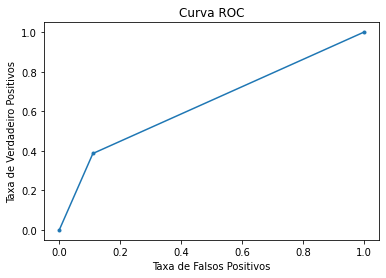

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*
* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [ ]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
erro = roc_auc_score(y_test,classificacao)
round(erro,3)

0.638

## **Validação cruzada**

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.85679012, 0.88395062, 0.88148148, 0.87654321, 0.87654321,
       0.85925926, 0.83559951, 0.67490729, 0.29295426, 0.36093943])

In [ ]:
round(scores.mean(),3),round(scores.std(),3)

(0.74, 0.215)

# **7. Comparando MLP com Árvore de Decisão e Random Forest**

### Validação Cruzada

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [ ]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [ ]:
#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

In [ ]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))

Árvore de Decisão:  0.625 0.288
Random Forest:  0.74 0.215
MLP: 0.753 0.196


**Comentários**

*Constatou-se no tópico acima, que os dados da MLP foi acima dos demais algoritmos testados com a média de 75,3%. Portanto, pode se supor que a MLP seria mais indicada para este dataset treinado e testado.*

Árvore de Decisão:  0.625 0.288
Random Forest:  0.74 0.215
MLP: 0.753 0.196



## 8. Otimização de Parâmetros

## Otimizando parâmetros
* Problema 
  * qual a melhor configuração de parâmetros para o modelo
* Otimização
  * escolher o melhor elemento de um conjunto
  * o significado de melhor é dado por uma função objetivo
    * taxa de erro

  <img src=https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/ac3f2f5a-9199-4bb7-8ce6-47e4dc307a0e.png width=500>

* Solução "mais simples"
  * tente todas as possibilidades
  * alto custo computacional
* Solução heurística
  * otimização estocástica
  * busca no espaço de soluções
* Random search
  * busca aleatória
  * sorteia alguns pontos do espaço e escolhe o melhor

  <img src= https://maelfabien.github.io/assets/images/expl4_4.jpg width=500>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [500,1000,2000]
              }
              
]

In [ ]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [ ]:
print(mlp.best_params_)

{'solver': 'sgd', 'max_iter': 500, 'hidden_layer_sizes': (100, 50), 'activation': 'logistic'}


In [ ]:
print(round(mlp.best_score_,3))

0.802


* Grid search
  * monta um espaço de soluções reduzido como um reticulado
  * testa todas as soluções, guardando a melhor

  <img src=https://maelfabien.github.io/assets/images/expl4_1.jpg width=500>

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [ ]:
print(mlp.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': 10, 'max_iter': 500, 'solver': 'sgd'}


In [ ]:
print(mlp.best_score_)

0.8024950624909447


In [ ]:
mlp.cv_results_

{'mean_fit_time': array([1.10464430e-01, 2.19554105e+00, 1.13392153e+00, 1.29531860e-01,
        2.07455106e+00, 1.02314172e+00, 1.05195093e-01, 2.04318895e+00,
        1.15094166e+00, 2.39353037e-01, 3.97742710e+00, 1.44709725e+00,
        2.39681053e-01, 3.96789680e+00, 1.47392168e+00, 2.46884441e-01,
        4.16655841e+00, 1.45619149e+00, 4.17787313e-01, 4.91115952e+00,
        1.53710685e+00, 4.27790213e-01, 5.02596769e+00, 1.48417602e+00,
        4.27638102e-01, 5.00482717e+00, 1.53384337e+00, 3.45497417e-01,
        1.92572303e+00, 7.77133179e-01, 2.84959078e-01, 2.22407160e+00,
        8.98413467e-01, 3.63014317e-01, 1.93205800e+00, 7.39578724e-01,
        8.29304409e-01, 4.93801293e+00, 1.33730068e+00, 9.91351509e-01,
        5.10659690e+00, 1.37221932e+00, 9.44465351e-01, 4.93699126e+00,
        1.52130513e+00, 1.64749379e+00, 3.27374458e-01, 2.39998279e+00,
        3.33101387e+00, 3.12466431e-01, 2.44634371e+00, 2.74551077e+00,
        3.03475857e-01, 2.48590837e+00, 8.24879

**Comentários**

*Observou-se no tópico acima que a otimização valeu a pena...pois ambas (Random Search e GridSearch) foram acima de 80%, enquanto que a MLP padrão obteve apenas 75,3%.*